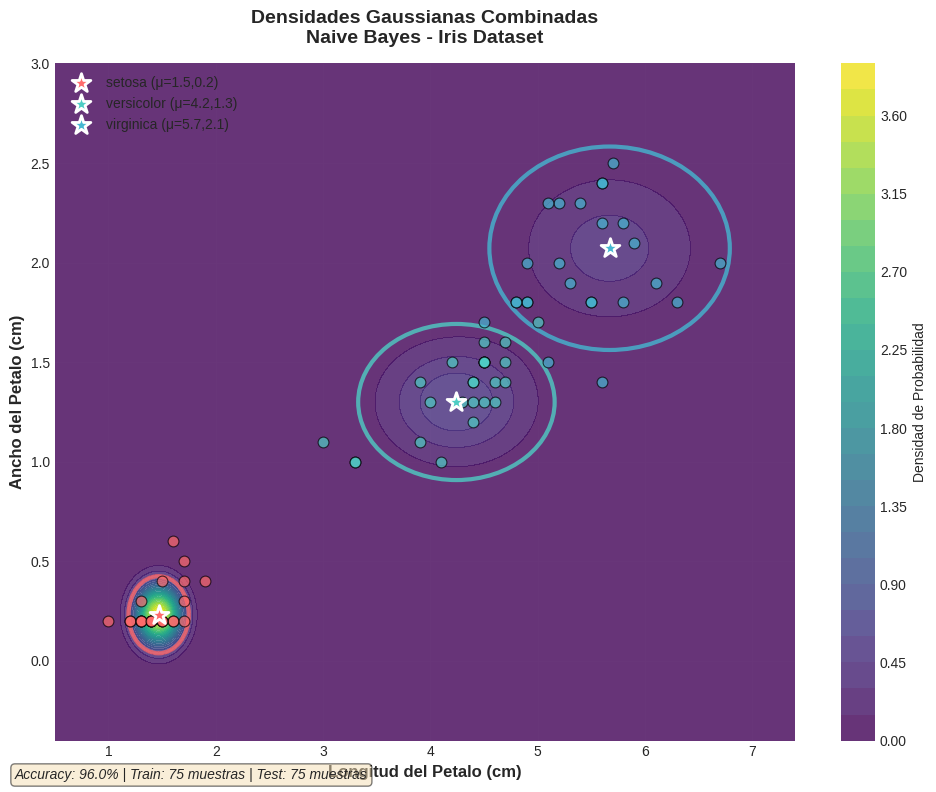

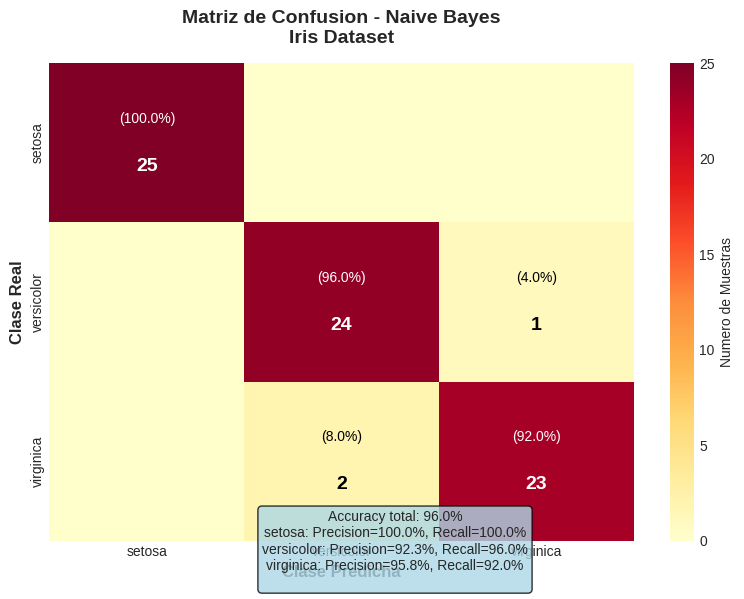

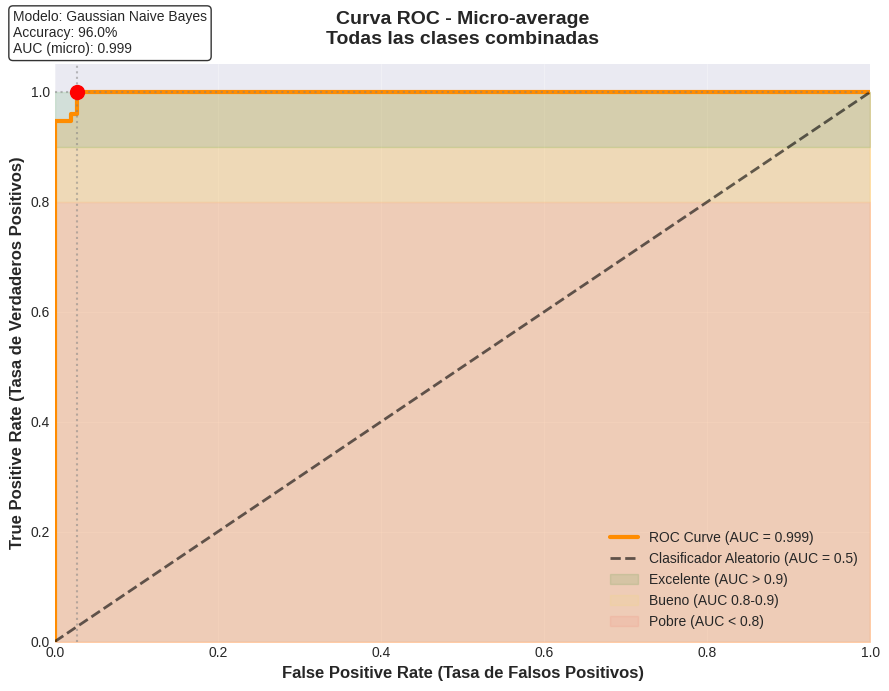

RESUMEN COMPLETO - NAIVE BAYES EN IRIS DATASET

 DATOS DEL MODELO:
  • Muestras totales: 150
  • Entrenamiento: 75 (50%)
  • Prueba: 75 (50%)

 RESULTADOS DE CLASIFICACION:
  • Accuracy: 96.00%
  • Clasificaciones correctas: 72/75

 METRICAS POR CLASE:
  • setosa:
    - Precision: 1.000
    - Recall: 1.000
    - F1-Score: 1.000
  • versicolor:
    - Precision: 0.923
    - Recall: 0.960
    - F1-Score: 0.941
  • virginica:
    - Precision: 0.958
    - Recall: 0.920
    - F1-Score: 0.939

 MATRIZ DE CONFUSION:
      setosa   versicolor   virginica
setosa      25      0      0
versicolor       0     24      1
virginica       0      2     23

 CURVA ROC (Micro-average):
  • AUC Score: 0.9987
  • Interpretacion: Excelente

 PARAMETROS DEL MODELO:
  • setosa:
    - Media: [1.468 0.232]
    - Varianza: [0.0198 0.0094]
    - Probabilidad a priori: 0.333
  • versicolor:
    - Media: [4.244 1.3  ]
    - Varianza: [0.2097 0.0384]
    - Probabilidad a priori: 0.333
  • virginica:
    - Media: [5.6

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from matplotlib.patches import Ellipse
import seaborn as sns
from scipy.stats import multivariate_normal
from sklearn.preprocessing import label_binarize
from matplotlib.colors import ListedColormap

# ==========================
# Configuracion inicial
# ==========================
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

# ==========================
# Cargar y preparar datos
# ==========================
iris = load_iris()
X = iris.data[:, 2:4]  # Solo caracteristicas de petalo
y = iris.target
labels = iris.target_names
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Colores atractivos

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42
)

# ==========================
# Entrenar modelo Naive Bayes
# ==========================
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)

# ==========================
# 1. GRAFICO: Densidades Gaussianas Combinadas (SEPARADO)
# ==========================
plt.figure(figsize=(10, 8))

# Crear cuadricula para contornos
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Calcular densidad combinada de las 3 gaussianas
combined_density = np.zeros_like(xx)
for cls in range(3):
    # Crear distribucion gaussiana para esta clase
    cov_matrix = np.diag(gnb.var_[cls])
    rv = multivariate_normal(mean=gnb.theta_[cls], cov=cov_matrix)
    z = rv.pdf(grid_points).reshape(xx.shape)
    combined_density += z * gnb.class_prior_[cls]

# Graficar contornos de densidad combinada
contour = plt.contourf(xx, yy, combined_density, levels=30,
                      cmap='viridis', alpha=0.8)

# Agregar elipses de ±2σ para cada clase
for cls, color in enumerate(colors):
    mean = gnb.theta_[cls]
    var = gnb.var_[cls]

    # Dibujar elipse
    width = 2 * 2 * np.sqrt(var[0])  # 2 desviaciones estandar
    height = 2 * 2 * np.sqrt(var[1])
    ellipse = Ellipse(xy=mean, width=width, height=height,
                     edgecolor=color, facecolor='none',
                     lw=3, linestyle='-', alpha=0.8)
    plt.gca().add_patch(ellipse)

    # Marcar centro (media)
    plt.scatter(mean[0], mean[1], c=color, s=200,
               marker='*', edgecolors='white', linewidth=2,
               zorder=5, label=f'{labels[cls]} (μ={mean[0]:.1f},{mean[1]:.1f})')

# Graficar puntos de prueba
for cls, color in enumerate(colors):
    mask = (y_test == cls)
    plt.scatter(X_test[mask, 0], X_test[mask, 1],
               c=color, s=60, alpha=0.7, edgecolors='black', linewidth=0.8)

plt.xlabel('Longitud del Petalo (cm)', fontsize=12, fontweight='bold')
plt.ylabel('Ancho del Petalo (cm)', fontsize=12, fontweight='bold')
plt.title('Densidades Gaussianas Combinadas\nNaive Bayes - Iris Dataset',
          fontsize=14, fontweight='bold', pad=15)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.colorbar(contour, label='Densidad de Probabilidad')

# Anadir texto informativo
accuracy = np.mean(y_pred == y_test) * 100
plt.figtext(0.02, 0.02,
           f'Accuracy: {accuracy:.1f}% | Train: {len(X_train)} muestras | Test: {len(X_test)} muestras',
           fontsize=10, style='italic', ha='left',
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ==========================
# 2. GRAFICO: Matriz de Confusion (SEPARADO)
# ==========================
plt.figure(figsize=(8, 6))

# Calcular matriz de confusion
cm = confusion_matrix(y_test, y_pred)

# Calcular porcentajes
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Crear heatmap
ax = sns.heatmap(cm, annot=False, fmt='d', cmap='YlOrRd',
                 xticklabels=labels, yticklabels=labels,
                 cbar_kws={'label': 'Numero de Muestras'})

# Anotar con valores y porcentajes
for i in range(3):
    for j in range(3):
        value = cm[i, j]
        percent = cm_percent[i, j]
        text_color = 'white' if cm[i, j] > cm.max() / 2 else 'black'

        # Solo mostrar porcentaje si hay valores
        if value > 0:
            ax.text(j + 0.5, i + 0.65, f'{value}',
                   ha='center', va='center',
                   fontsize=14, fontweight='bold', color=text_color)
            ax.text(j + 0.5, i + 0.35, f'({percent:.1f}%)',
                   ha='center', va='center',
                   fontsize=10, color=text_color)

# Calcular y mostrar metricas
accuracy = np.trace(cm) / np.sum(cm) * 100
precision = []
recall = []

for i in range(3):
    prec = cm[i, i] / np.sum(cm[:, i]) if np.sum(cm[:, i]) > 0 else 0
    rec = cm[i, i] / np.sum(cm[i, :]) if np.sum(cm[i, :]) > 0 else 0
    precision.append(prec)
    recall.append(rec)

# Informacion adicional
info_text = f"Accuracy total: {accuracy:.1f}%\n"
for i, label in enumerate(labels):
    info_text += f"{label}: Precision={precision[i]:.1%}, Recall={recall[i]:.1%}\n"

plt.figtext(0.5, 0.01, info_text, ha='center', va='bottom',
           fontsize=10, bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.xlabel('Clase Predicha', fontsize=12, fontweight='bold')
plt.ylabel('Clase Real', fontsize=12, fontweight='bold')
plt.title('Matriz de Confusion - Naive Bayes\nIris Dataset',
          fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

# ==========================
# 3. GRAFICO: UNA SOLA CURVA ROC para las 3 clases (Micro-average)
# ==========================
plt.figure(figsize=(9, 7))

# Binarizar etiquetas
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Calcular curva ROC micro-average (UNA SOLA CURVA)
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Graficar la curva ROC micro-average
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=3,
         label=f'ROC Curve (AUC = {roc_auc_micro:.3f})')

# Linea de referencia (clasificador aleatorio)
plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.6,
         label='Clasificador Aleatorio (AUC = 0.5)')

# Rellenar area bajo la curva
plt.fill_between(fpr_micro, tpr_micro, alpha=0.2, color='darkorange')

# Areas de referencia para interpretacion
plt.fill_between([0, 1], [0.9, 0.9], [1, 1], alpha=0.1, color='green',
                label='Excelente (AUC > 0.9)')
plt.fill_between([0, 1], [0.8, 0.8], [0.9, 0.9], alpha=0.05, color='yellow',
                label='Bueno (AUC 0.8-0.9)')
plt.fill_between([0, 1], [0, 0], [0.8, 0.8], alpha=0.05, color='red',
                label='Pobre (AUC < 0.8)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Tasa de Falsos Positivos)',
          fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Tasa de Verdaderos Positivos)',
          fontsize=12, fontweight='bold')
plt.title('Curva ROC - Micro-average\nTodas las clases combinadas',
          fontsize=14, fontweight='bold', pad=15)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# Anadir punto optimo (umbral que maximiza TPR - FPR)
optimal_idx = np.argmax(tpr_micro - fpr_micro)
optimal_fpr = fpr_micro[optimal_idx]
optimal_tpr = tpr_micro[optimal_idx]
plt.scatter(optimal_fpr, optimal_tpr, color='red', s=100,
           marker='o', zorder=5, label=f'Punto optimo\nFPR={optimal_fpr:.2f}, TPR={optimal_tpr:.2f}')

# Anadir linea al punto optimo
plt.axhline(y=optimal_tpr, color='gray', linestyle=':', alpha=0.5)
plt.axvline(x=optimal_fpr, color='gray', linestyle=':', alpha=0.5)

# Informacion sobre el modelo
model_info = f"Modelo: Gaussian Naive Bayes\nAccuracy: {accuracy:.1f}%\nAUC (micro): {roc_auc_micro:.3f}"
plt.figtext(0.02, 0.98, model_info, fontsize=10,
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
           verticalalignment='top')

plt.tight_layout()
plt.show()



# ==========================
# RESUMEN EN CONSOLA
# ==========================
print("="*70)
print("RESUMEN COMPLETO - NAIVE BAYES EN IRIS DATASET")
print("="*70)

print(f"\n DATOS DEL MODELO:")
print(f"  • Muestras totales: {len(X)}")
print(f"  • Entrenamiento: {len(X_train)} ({len(X_train)/len(X)*100:.0f}%)")
print(f"  • Prueba: {len(X_test)} ({len(X_test)/len(X)*100:.0f}%)")

print(f"\n RESULTADOS DE CLASIFICACION:")
print(f"  • Accuracy: {accuracy:.2f}%")
print(f"  • Clasificaciones correctas: {np.sum(y_pred == y_test)}/{len(y_test)}")

print(f"\n METRICAS POR CLASE:")
for i, label in enumerate(labels):
    prec = precision[i]
    rec = recall[i]
    f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
    print(f"  • {label}:")
    print(f"    - Precision: {prec:.3f}")
    print(f"    - Recall: {rec:.3f}")
    print(f"    - F1-Score: {f1:.3f}")

print(f"\n MATRIZ DE CONFUSION:")
print("      " + "   ".join(labels))
for i, label in enumerate(labels):
    row = " ".join([f"{cm[i,j]:>6}" for j in range(3)])
    print(f"{label:>5}  {row}")

print(f"\n CURVA ROC (Micro-average):")
print(f"  • AUC Score: {roc_auc_micro:.4f}")
print(f"  • Interpretacion: {'Excelente' if roc_auc_micro > 0.9 else 'Buena' if roc_auc_micro > 0.8 else 'Regular'}")

print(f"\n PARAMETROS DEL MODELO:")
for i, label in enumerate(labels):
    print(f"  • {label}:")
    print(f"    - Media: {gnb.theta_[i].round(3)}")
    print(f"    - Varianza: {gnb.var_[i].round(4)}")
    print(f"    - Probabilidad a priori: {gnb.class_prior_[i]:.3f}")

print("\n" + "="*70)